<a href="https://colab.research.google.com/github/paramKeswani/LSTM-MODEL-STOCK-PREDICTION/blob/main/HDFC_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/HDFCBANK.NS.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-01,1081.400024,1087.500000,1029.125000,1030.599976,994.456116,102832700
1,2018-09-01,1034.699951,1039.474976,955.099976,1003.025024,967.848267,110860266
2,2018-10-01,1004.900024,1026.099976,942.500000,955.875000,922.351868,165463186
3,2018-11-01,965.000000,1068.775024,948.000000,1064.224976,1026.901855,137555020
4,2018-12-01,1065.500000,1079.699951,1016.000000,1060.849976,1023.645203,94995760


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
55,2023-03-01,1612.000000,1645.949951,1532.050049,1609.550049,1591.301147,281250547
56,2023-04-01,1607.550049,1720.000000,1602.750000,1687.599976,1668.466187,296725881
57,2023-05-01,1687.599976,1734.449951,1597.349976,1610.849976,1592.586304,385815045
58,2023-06-01,1619.900024,1708.800049,1579.000000,1701.400024,1701.400024,275004627
59,2023-07-01,1712.500000,1757.500000,1627.150024,1690.699951,1690.699951,396706199


In [ ]:
df1=df.reset_index()['Close']

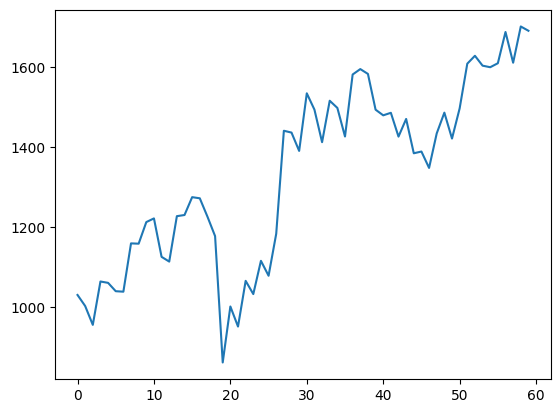

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so using MinMax scaler
import numpy as np

In [ ]:
### LSTM are sensitive to the scale of the data. so using MinMax scaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.20095289]
 [0.16810602]
 [0.1119416 ]
 [0.24100649]
 [0.23698624]
 [0.21212025]
 [0.21069089]
 [0.35443708]
 [0.3535735 ]
 [0.41783803]
 [0.42879687]
 [0.31438347]
 [0.30026796]
 [0.43543767]
 [0.43889214]
 [0.49201897]
 [0.48862412]
 [0.43406793]
 [0.37611674]
 [0.        ]
 [0.16664677]
 [0.10690887]
 [0.24294217]
 [0.20357359]
 [0.30250143]
 [0.25812978]
 [0.38314476]
 [0.68963663]
 [0.68421683]
 [0.62966048]
 [0.80107207]
 [0.75253127]
 [0.65562838]
 [0.77897552]
 [0.75759381]
 [0.67248353]
 [0.85705777]
 [0.87319825]
 [0.85878493]
 [0.75241218]
 [0.73555688]
 [0.74306126]
 [0.67224536]
 [0.7247766 ]
 [0.62263246]
 [0.62781409]
 [0.57903511]
 [0.68171522]
 [0.74353776]
 [0.66640852]
 [0.7561643 ]
 [0.88927925]
 [0.91274568]
 [0.88338294]
 [0.87873729]
 [0.89058967]
 [0.98356159]
 [0.89213812]
 [1.        ]
 [0.98725423]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(36, 5)
(36,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)


(12, 5)
(12,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
print(X_train)

[[[0.20095289]
  [0.16810602]
  [0.1119416 ]
  [0.24100649]
  [0.23698624]]

 [[0.16810602]
  [0.1119416 ]
  [0.24100649]
  [0.23698624]
  [0.21212025]]

 [[0.1119416 ]
  [0.24100649]
  [0.23698624]
  [0.21212025]
  [0.21069089]]

 [[0.24100649]
  [0.23698624]
  [0.21212025]
  [0.21069089]
  [0.35443708]]

 [[0.23698624]
  [0.21212025]
  [0.21069089]
  [0.35443708]
  [0.3535735 ]]

 [[0.21212025]
  [0.21069089]
  [0.35443708]
  [0.3535735 ]
  [0.41783803]]

 [[0.21069089]
  [0.35443708]
  [0.3535735 ]
  [0.41783803]
  [0.42879687]]

 [[0.35443708]
  [0.3535735 ]
  [0.41783803]
  [0.42879687]
  [0.31438347]]

 [[0.3535735 ]
  [0.41783803]
  [0.42879687]
  [0.31438347]
  [0.30026796]]

 [[0.41783803]
  [0.42879687]
  [0.31438347]
  [0.30026796]
  [0.43543767]]

 [[0.42879687]
  [0.31438347]
  [0.30026796]
  [0.43543767]
  [0.43889214]]

 [[0.31438347]
  [0.30026796]
  [0.43543767]
  [0.43889214]
  [0.49201897]]

 [[0.30026796]
  [0.43543767]
  [0.43889214]
  [0.49201897]
  [0.48862412]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(5,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_10 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(
    X_train,                   # Training data features (input data)
    y_train,                   # Training data labels (output data)
    validation_data=(X_test, ytest),  # Validation data (features and labels)
    epochs=100,                # Number of training epochs (iterations)
    batch_size=64,             # Number of samples processed before updating the model weights
    verbose=1                  # Verbosity level (0 = silent, 1 = progress bar, 2 = one line per epoch)
)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.2916 - val_loss: 0.6910
Epoch 2/100
1/1 [==============================] - 0s 73ms/step - loss: 0.2727 - val_loss: 0.6507
Epoch 3/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2540 - val_loss: 0.6098
Epoch 4/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2353 - val_loss: 0.5676
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 0.2163 - val_loss: 0.5238
Epoch 6/100
1/1 [==============================] - 0s 53ms/step - loss: 0.1969 - val_loss: 0.4781
Epoch 7/100
1/1 [==============================] - 0s 56ms/step - loss: 0.1770 - val_loss: 0.4303
Epoch 8/100
1/1 [==============================] - 0s 57ms/step - loss: 0.1567 - val_loss: 0.3802
Epoch 9/100
1/1 [==============================] - 0s 54ms/step - loss: 0.1360 - val_loss: 0.3280
Epoch 10/100
1/1 [==============================] - 0s 53ms/step - loss: 0.1153 - val_loss: 0.2741
Epoch 11/100
1/1 [===

In [ ]:
import tensorflow as tf

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 25ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1274.9664330043797

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))


1508.431329563552

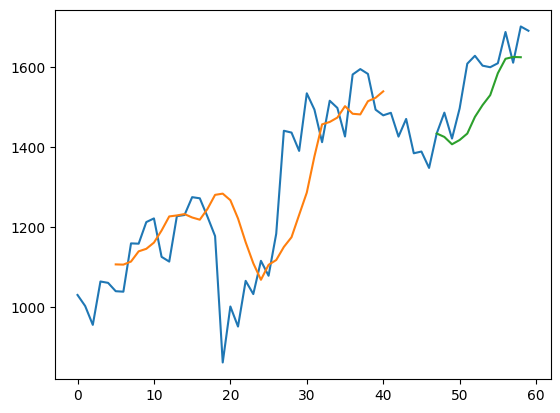

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()